<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Work/Copy_of_Untitled138.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def calculate_composite_indicator(data):
    # Select relevant columns
    columns_to_use = ['Date','Close', 'feat_PE','feat_PB','feat_Div_Yield', 'new_high_new_low', 'nifty_above_dma', 'FIICash', 'DIIcash']

    df = data[columns_to_use].copy()

    # Convert Date to datetime
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

    # Set Date as index
    df.set_index('Date', inplace=True)

    # Calculate percentiles for each feature
    for column in df.columns:
        df[f'{column}_percentile'] = df[column].rank(pct=True)

    # Calculate composite indicator (average of percentiles)
    percentile_columns = [col for col in df.columns if col.endswith('_percentile')]
    df['composite_indicator'] = df[percentile_columns].mean(axis=1)
    # Categorize valuation
    df['valuation'] = pd.cut(df['composite_indicator'],
                             bins=[0, 0.33, 0.67, 1],
                             labels=['Undervalued', 'Fairly Valued', 'Overvalued'])


    return df

# Example usage
data = pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/.github.io/master/work/ml/data_for_ml.csv')  # Replace with your actual data source
result = calculate_composite_indicator(data)

# Display the resu

In [21]:
def plot_indicator_and_close(df):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

    # Plot composite indicator
    ax1.plot(df.index, df['composite_indicator'], color='blue')
    ax1.set_title('Composite Indicator')
    ax1.set_ylabel('Indicator Value')

    # Plot Close price
    ax2.plot(df.index, df['Close'], color='green')
    ax2.set_title('Close Price')
    ax2.set_ylabel('Price')

    # Set x-axis label
    ax2.set_xlabel('Date')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()


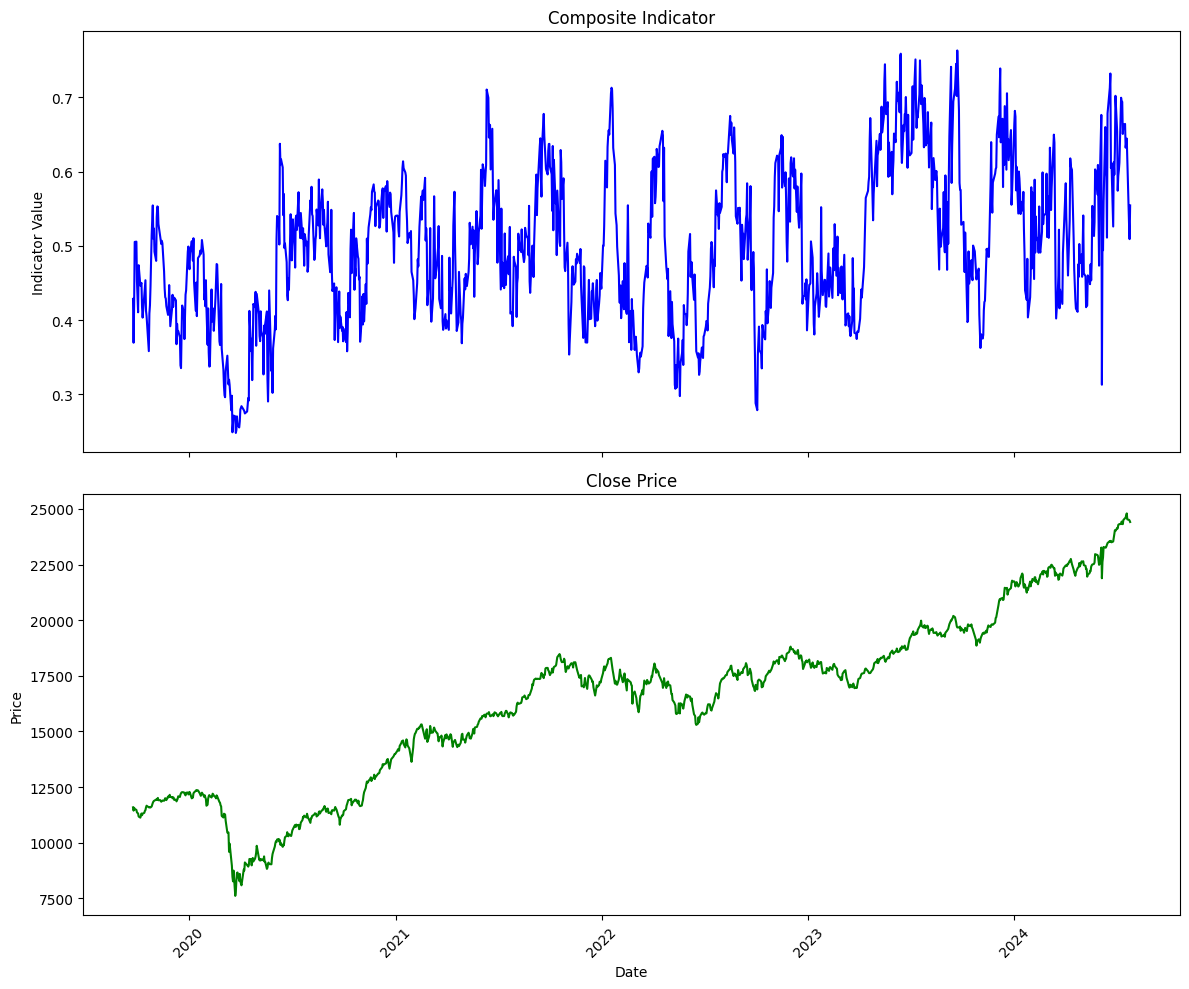

In [22]:
plot_indicator_and_close(result)

In [23]:
def plot_indicator_close_and_valuation(df):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

    # Plot composite indicator
    scatter = ax1.scatter(df.index, df['composite_indicator'],
                          c=df['valuation'].map({'Undervalued': 'green',
                                                 'Fairly Valued': 'yellow',
                                                 'Overvalued': 'red'}),
                          alpha=0.6)
    ax1.set_title('Composite Indicator with Valuation Zones')
    ax1.set_ylabel('Indicator Value')
    ax1.axhline(y=0.33, color='gray', linestyle='--', alpha=0.5)
    ax1.axhline(y=0.67, color='gray', linestyle='--', alpha=0.5)
    ax1.text(df.index[0], 0.17, 'Undervalued', verticalalignment='center')
    ax1.text(df.index[0], 0.5, 'Fairly Valued', verticalalignment='center')
    ax1.text(df.index[0], 0.83, 'Overvalued', verticalalignment='center')

    # Add legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=c, markersize=10)
               for c in ['green', 'yellow', 'red']]
    ax1.legend(handles, ['Undervalued', 'Fairly Valued', 'Overvalued'], loc='upper left')

    # Plot Close price
    ax2.plot(df.index, df['Close'], color='blue')
    ax2.set_title('Close Price')
    ax2.set_ylabel('Price')
    ax2.set_xlabel('Date')

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

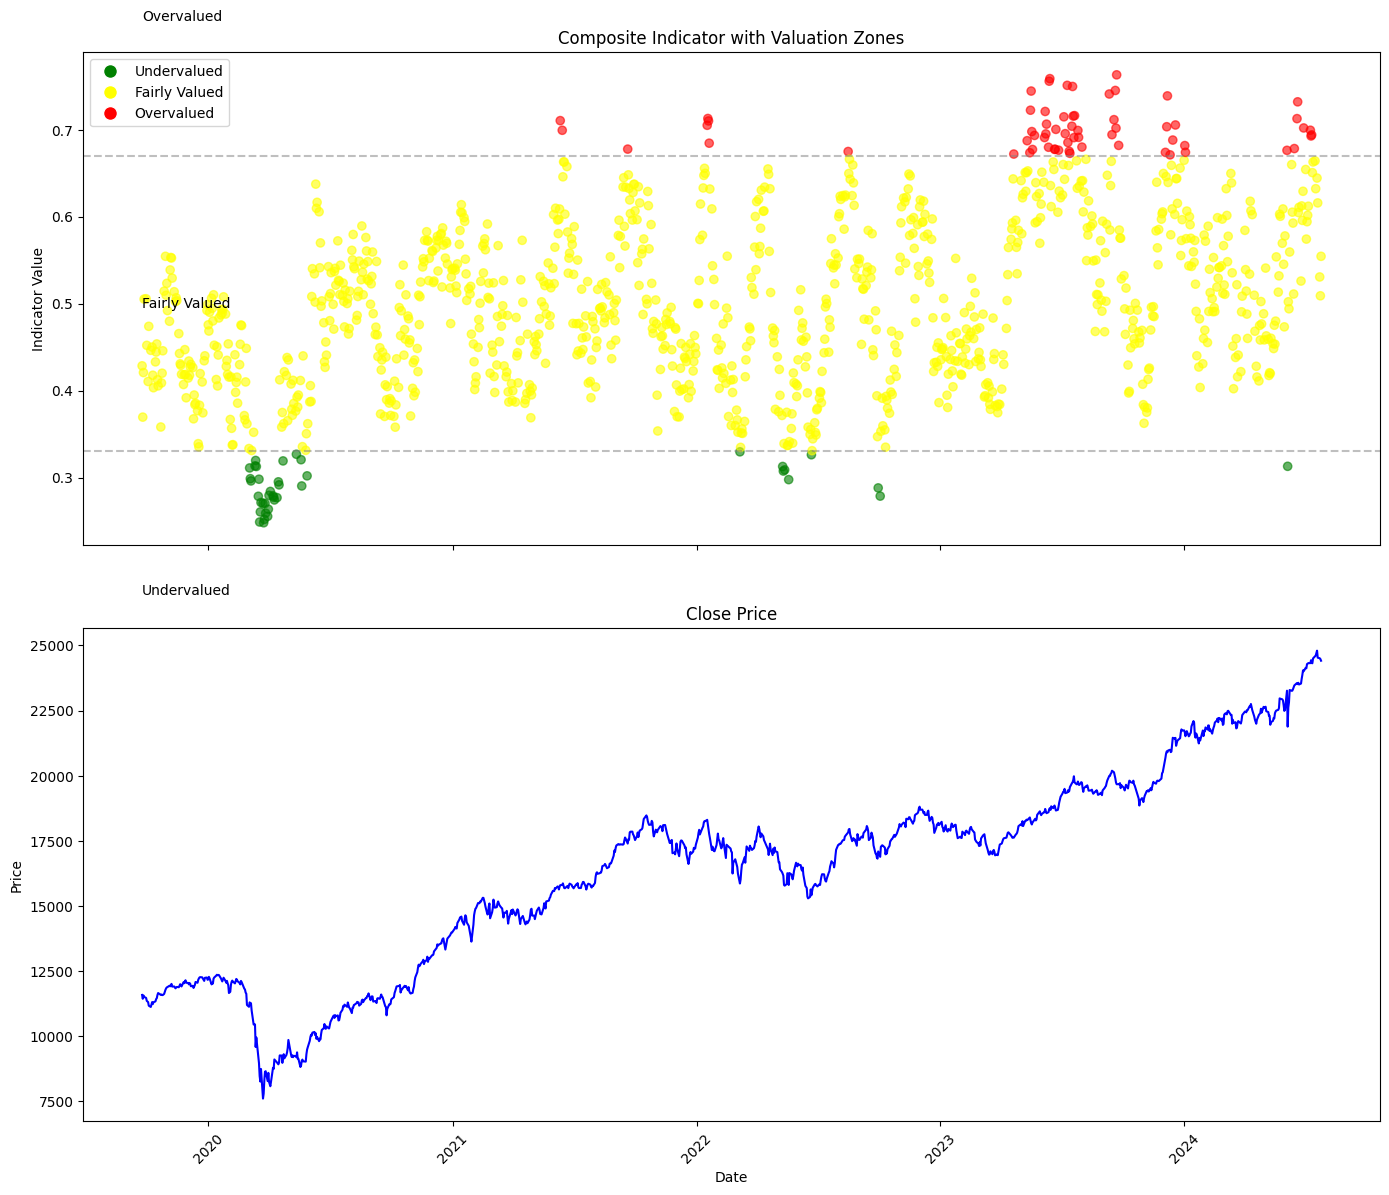

In [24]:
plot_indicator_close_and_valuation(result)

In [25]:
def plot_combined_chart(df):
    from matplotlib.colors import LinearSegmentedColormap

    fig, ax = plt.subplots(figsize=(14, 8))

    # Plot Close price
    ax.plot(df.index, df['Close'], color='gray', alpha=0.6, label='Close Price')

    # Create custom colormap
    colors = ['green', 'yellow', 'red']
    n_bins = 3
    cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

    # Plot composite indicator as scatter
    scatter = ax.scatter(df.index, df['Close'],
                         c=df['composite_indicator'],
                         cmap=cmap,
                         s=50,
                         alpha=0.7)

    # Customize the plot
    ax.set_title('Close Price with Composite Indicator Valuation', fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Close Price', fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=10)

    # Add color bar
    cbar = plt.colorbar(scatter)
    cbar.set_label('Composite Indicator', fontsize=12)

    # Add valuation zone labels to color bar
    cbar.ax.text(1.5, 0.15, 'Undervalued', ha='left', va='center', fontsize=10, rotation=90)
    cbar.ax.text(1.5, 0.5, 'Fairly Valued', ha='left', va='center', fontsize=10, rotation=90)
    cbar.ax.text(1.5, 0.85, 'Overvalued', ha='left', va='center', fontsize=10, rotation=90)

    # Rotate x-axis labels
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

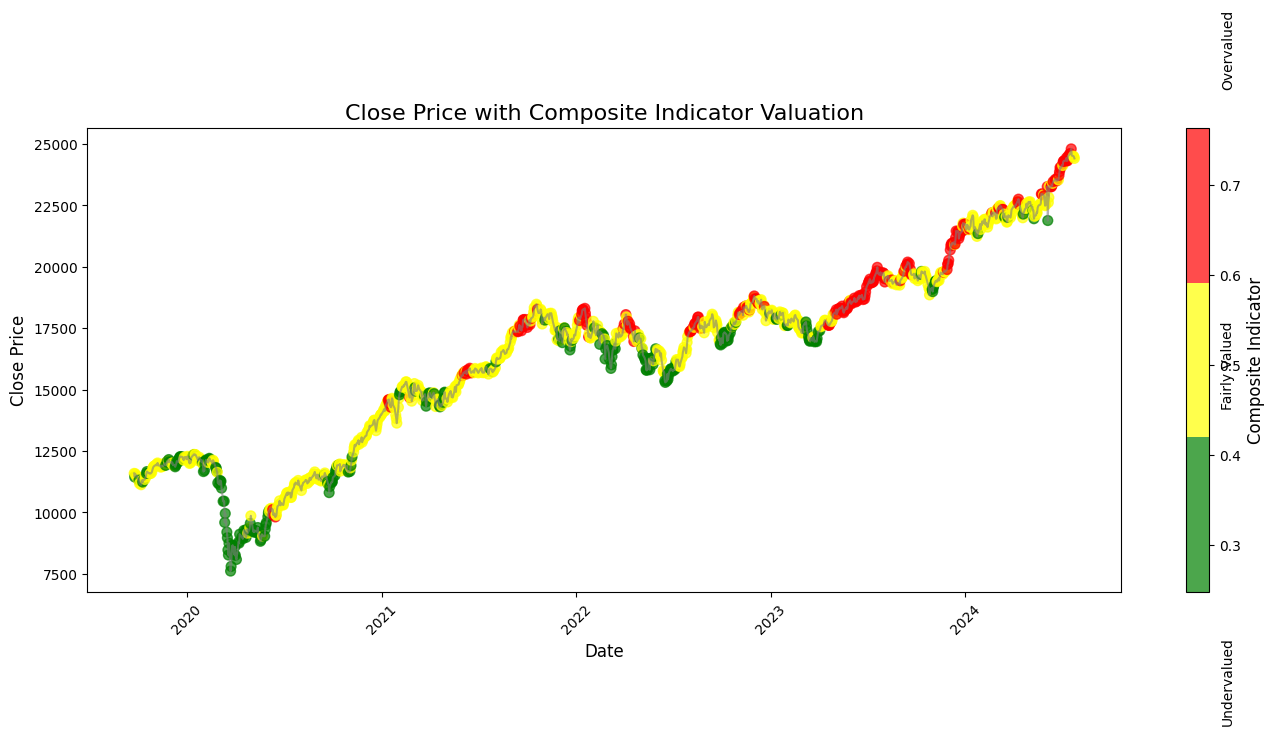

In [26]:
plot_combined_chart(result)